<a href="https://colab.research.google.com/github/iamRichardCN/Data-analysis-on-the-leading-causes-of-death-in-Nigeria/blob/main/Analysis_of_districtheating_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/narrowfile.csv")
df.head()

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST,HEATING_COST
0,84,98.0,2.3,73.0,571.0
1,90,74.0,1.1,67.0,740.0
2,84,97.0,1.8,59.0,720.0
3,66,447.0,4.3,140.0,664.0
4,86,92.0,1.0,62.0,460.0


In [12]:
df=df.dropna()

In [14]:
# Check for missing values in columns
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ENERGY_EFFICIENCY     0
ENERGY_CONSUMPTION    0
CO2_EMISSIONS         0
HOT_WATER_COST        0
HEATING_COST          0
dtype: int64


In [30]:
# Selecting independent variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["ENERGY_EFFICIENCY", "ENERGY_CONSUMPTION", "CO2_EMISSIONS", "HOT_WATER_COST"]]

# Dependent variable
y = df["HEATING_COST"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

0          571.0
1          740.0
2          720.0
3          664.0
4          460.0
           ...  
181677     855.0
181678    1756.0
181679     583.0
181680    1128.0
181681    1053.0
Name: HEATING_COST, Length: 181680, dtype: float64

In [31]:
# Calculate and print the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 86049.59074123288
R-squared: 0.4953850765014677


In [24]:
# Load the new data
df_new = pd.read_excel("/content/narrowpotential.xlsx")
df_new.head()

,ENERGY_EFFICIENCY,ENERGY_CONSUMPTION,CO2_EMISSIONS,HOT_WATER_COST
0,84,98.0,2.3,73.0
1,90,74.0,1.1,67.0
2,84,97.0,1.8,59.0
3,66,447.0,4.3,140.0
4,86,92.0,1.0,62.0


In [25]:
df_new=df_new.dropna()

In [26]:
# Check for missing values in columns
missing_values = df_new.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ENERGY_EFFICIENCY     0
ENERGY_CONSUMPTION    0
CO2_EMISSIONS         0
HOT_WATER_COST        0
dtype: int64


In [32]:
p_cost = model.predict(df_new)
# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, p_cost)

# Calculate the R-squared (coefficient of determination) score
r2 = r2_score(y, p_cost)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 89306.15739452188
R-squared: 0.5509907008548981


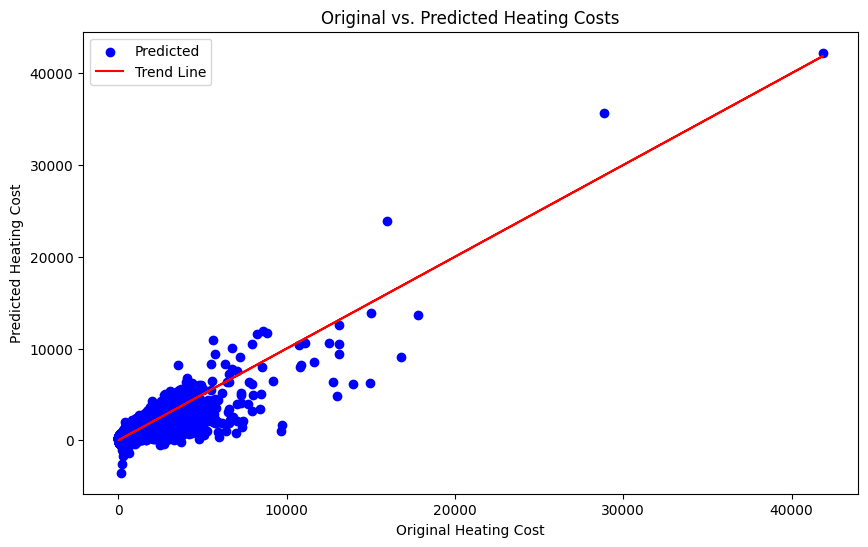

In [33]:
import matplotlib.pyplot as plt

# Plotting the original heating costs and the predicted costs
plt.figure(figsize=(10, 6))
plt.scatter(y, p_cost, color='blue', label='Predicted')
plt.plot(y, y, color='red', label='Trend Line')
plt.xlabel('Original Heating Cost')
plt.ylabel('Predicted Heating Cost')
plt.title('Original vs. Predicted Heating Costs')
plt.legend()
plt.show()


In [36]:
# Calculate the cost difference
cost_difference = y - p_cost

# Create a new DataFrame with original and predicted costs, along with the cost difference
cost_comparison_df = pd.DataFrame({'Original Heating Cost': y, 'Predicted Heating Cost': p_cost, 'Cost Difference': cost_difference})
cost_comparison_df.head()

,Original Heating Cost,Predicted Heating Cost,Cost Difference
0,571.0,768.130899,-197.130899
1,740.0,543.577039,196.422961
2,720.0,658.026971,61.973029
3,664.0,717.668539,-53.668539
4,460.0,484.925386,-24.925386


In [37]:
# Assuming you have cost_comparison_df DataFrame

# Filter the DataFrame to get positive and negative cost differences
increased_costs = cost_comparison_df[cost_comparison_df['Cost Difference'] > 0]
decreased_costs = cost_comparison_df[cost_comparison_df['Cost Difference'] < 0]

# Calculate the total increase and decrease in heating costs
total_increase = increased_costs['Cost Difference'].sum()
total_decrease = decreased_costs['Cost Difference'].sum()

# Print the results
print("Total Increase in Heating Costs:", total_increase)
print("Total Decrease in Heating Costs:", total_decrease)

# Determine the overall effect on heating costs
if total_increase > 0:
    print("The new scenario has led to an overall increase in heating costs.")
elif total_decrease < 0:
    print("The new scenario has led to an overall decrease in heating costs.")
else:
    print("The new scenario has not significantly affected heating costs.")


Total Increase in Heating Costs: 18053440.07854339
Total Decrease in Heating Costs: -18145807.564603787
The new scenario has led to an overall increase in heating costs.
